In [ ]:
!pip install spotipy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 6.3 MB/s eta 0:00:00


In [8]:
import requests

CLIENT_ID = '69e356f99470430a95abe533afe34d40'
CLIENT_SECRET = '60c6c47bc03c4a9282eb625954305c4b'

AUTH_URL = 'https://accounts.spotify.com/api/token'

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [10]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2021', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])
        

In [11]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,87,4oUHIQIBe0LHzYfvXNW4QM
1,Peso Pluma,Por las Noches,2VzCjpKvPB1l1tqLndtAQa,93,12GqGscKJx3aE4t07u7eVZ
2,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,89,2jku7tDXc6XoB6MO2hFuqg
3,Jordan Davis,Buy Dirt,69AIpwGNLxr4qS1X5ynx60,83,77kULmXAQ6vWer7IIHdGzI
4,Morgan Wallen,More Than My Hometown,5OELUCYgOHKFAvCERnAvfS,81,4oUHIQIBe0LHzYfvXNW4QM


In [12]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [13]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,87,4oUHIQIBe0LHzYfvXNW4QM,90,[contemporary country],6055105
1,Peso Pluma,Por las Noches,2VzCjpKvPB1l1tqLndtAQa,93,12GqGscKJx3aE4t07u7eVZ,94,"[corrido, nueva musica mexicana, sad sierreno]",3996693
2,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,89,2jku7tDXc6XoB6MO2hFuqg,80,"[canadian hip hop, canadian trap, melodic rap,...",5557882
3,Jordan Davis,Buy Dirt,69AIpwGNLxr4qS1X5ynx60,83,77kULmXAQ6vWer7IIHdGzI,74,"[contemporary country, country road]",916930
4,Morgan Wallen,More Than My Hometown,5OELUCYgOHKFAvCERnAvfS,81,4oUHIQIBe0LHzYfvXNW4QM,90,[contemporary country],6055105


In [14]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)

In [15]:
print(track_features[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [16]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [17]:
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)

<ipython-input-17-72a88ae2a0e4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-17-72a88ae2a0e4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-17-72a88ae2a0e4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-17-72a88ae2a0e4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-17-72a88ae2a0e4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [18]:
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.505,0.657,11,-5.240,0,0.0318,0.373,0.001070,0.1260,0.252,196.000,audio_features,3cBsEDNhFI9E82vPj3kvi3,spotify:track:3cBsEDNhFI9E82vPj3kvi3,https://api.spotify.com/v1/tracks/3cBsEDNhFI9E...,https://api.spotify.com/v1/audio-analysis/3cBs...,178520,3
1,0.807,0.595,0,-7.190,1,0.0325,0.310,0.000024,0.0735,0.392,92.491,audio_features,2VzCjpKvPB1l1tqLndtAQa,spotify:track:2VzCjpKvPB1l1tqLndtAQa,https://api.spotify.com/v1/tracks/2VzCjpKvPB1l...,https://api.spotify.com/v1/audio-analysis/2VzC...,239845,4
2,0.645,0.534,6,-10.800,0,0.0479,0.157,0.000000,0.0863,0.463,105.020,audio_features,3azJifCSqg9fRij2yKIbWz,spotify:track:3azJifCSqg9fRij2yKIbWz,https://api.spotify.com/v1/tracks/3azJifCSqg9f...,https://api.spotify.com/v1/audio-analysis/3azJ...,226467,4
3,0.586,0.559,4,-6.725,1,0.0500,0.639,0.000000,0.0872,0.437,177.945,audio_features,69AIpwGNLxr4qS1X5ynx60,spotify:track:69AIpwGNLxr4qS1X5ynx60,https://api.spotify.com/v1/tracks/69AIpwGNLxr4...,https://api.spotify.com/v1/audio-analysis/69AI...,167480,4
4,0.620,0.869,6,-5.479,1,0.0462,0.615,0.000000,0.1310,0.597,126.019,audio_features,5OELUCYgOHKFAvCERnAvfS,spotify:track:5OELUCYgOHKFAvCERnAvfS,https://api.spotify.com/v1/tracks/5OELUCYgOHKF...,https://api.spotify.com/v1/audio-analysis/5OEL...,216573,4


In [19]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      996 non-null    float64
 1   energy            996 non-null    float64
 2   loudness          996 non-null    float64
 3   speechiness       996 no

In [20]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      996 non-null    float64 
 1   energy            996 non-null    float64 
 2   loudness          996 non-null    float64 
 3   speechin

In [21]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(30)

,track_name,artist_name
1,Por las Noches,Peso Pluma
2,The Color Violet,Tory Lanez
9,Sunroof,Nicky Youre
33,METAMORPHOSIS,INTERWORLD
139,Where Are You Now,Lost Frequencies
30,Ghost,Justin Bieber
22,Shivers,Ed Sheeran
18,good 4 u,Olivia Rodrigo
64,Cold Heart - PNAU Remix,Elton John
47,STAY (with Justin Bieber),The Kid LAROI


In [23]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(30)

,artist_followers,artist_popularity,artist_name,artist_genres
22,112512245,91,Ed Sheeran,"['pop', 'uk pop']"
764,81391733,88,Billie Eilish,"['art pop', 'electropop', 'pop']"
170,76051212,100,Taylor Swift,['pop']
174,75854146,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
607,72311507,89,Justin Bieber,"['canadian pop', 'pop']"
821,71635761,90,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
61,69986890,97,Bad Bunny,"['reggaeton', 'trap latino', 'urbano latino']"
112,65856314,95,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
663,65649480,89,BTS,"['k-pop', 'k-pop boy group', 'pop']"
124,48902646,85,Adele,"['british soul', 'pop', 'pop soul', 'uk pop']"


In [24]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                      192
rap                      146
contemporary country      83
hip hop                   81
sad sierreno              47
corrido                   45
trap                      42
pov: indie                40
country road              39
urbano latino             38
nueva musica mexicana     37
trap latino               35
sierreno                  34
canadian pop              33
melodic rap               33
canadian hip hop          33
country                   33
toronto rap               30
reggaeton                 30
rage rap                  29
dtype: int64

Text(0.5, 1.0, 'Top genres')

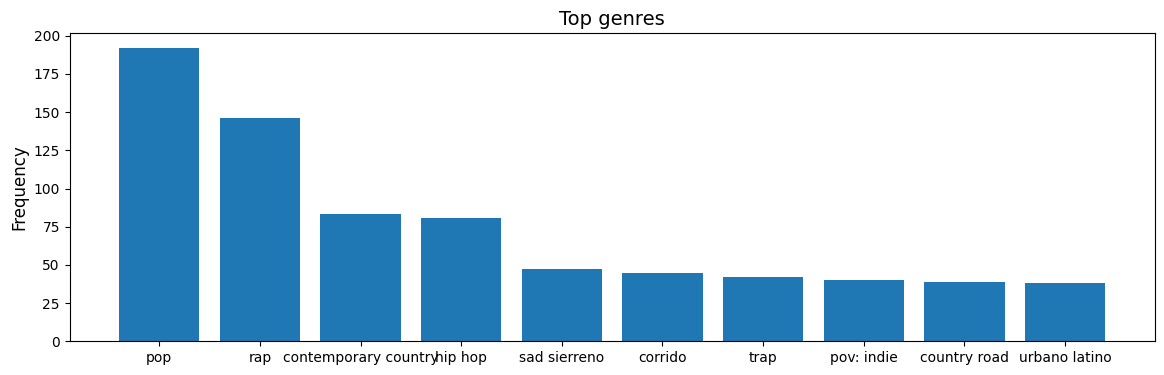

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

In [26]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:30])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Drake,rap
2,Luke Combs,contemporary country
3,Drake,hip hop
4,Junior H,sad sierreno
5,Calibre 50,corrido
6,Lil Baby,trap
7,Twenty One Pilots,pov: indie
8,Blake Shelton,country road
9,Bad Bunny,urbano latino


In [27]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(30)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Ghost,88,Justin Bieber,pop
1,The Color Violet,89,Tory Lanez,rap
2,Wasted On You,87,Morgan Wallen,contemporary country
3,Fair Trade (with Travis Scott),87,Drake,hip hop
4,Por las Noches,93,Peso Pluma,sad sierreno
5,Por las Noches,93,Peso Pluma,corrido
6,The Color Violet,89,Tory Lanez,trap
7,Freaks,86,Surf Curse,pov: indie
8,Buy Dirt,83,Jordan Davis,country road
9,Yonaguni,85,Bad Bunny,urbano latino


<ipython-input-28-27f84aca68cc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(tf_df.corr(), annot=True)


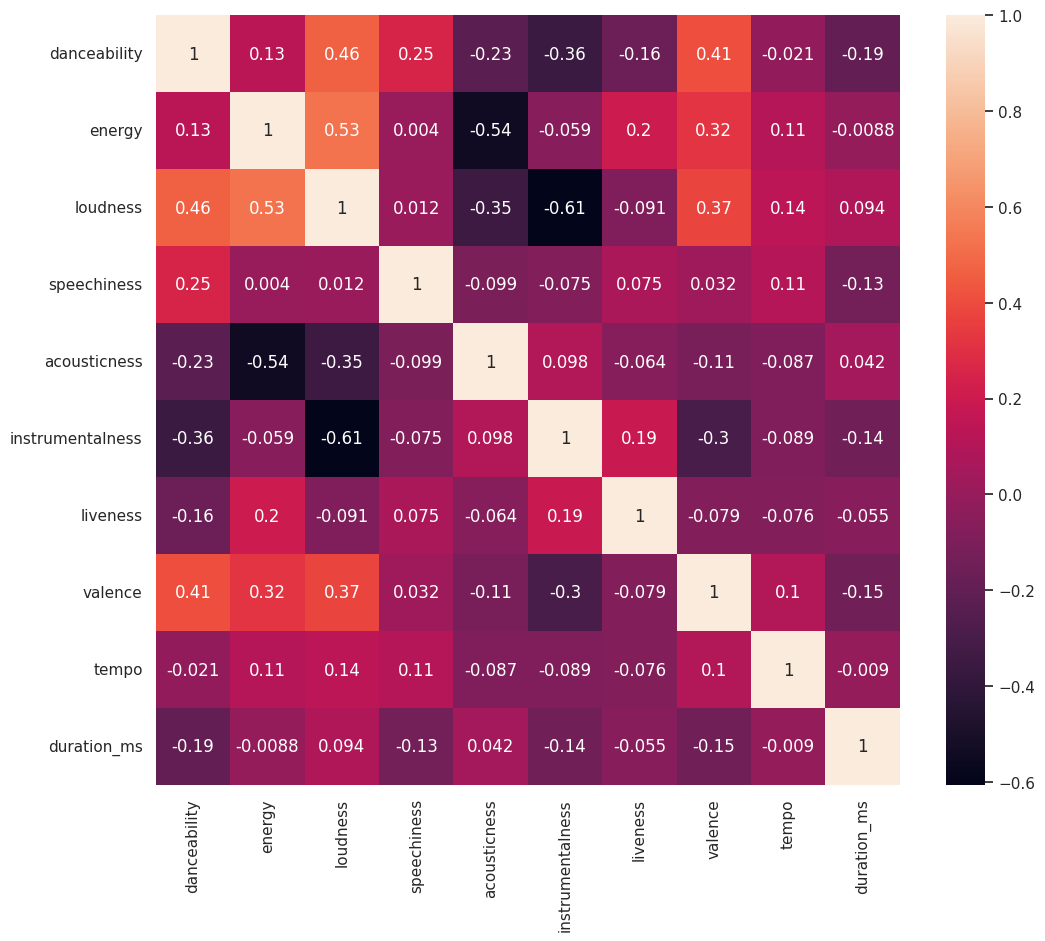

In [28]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

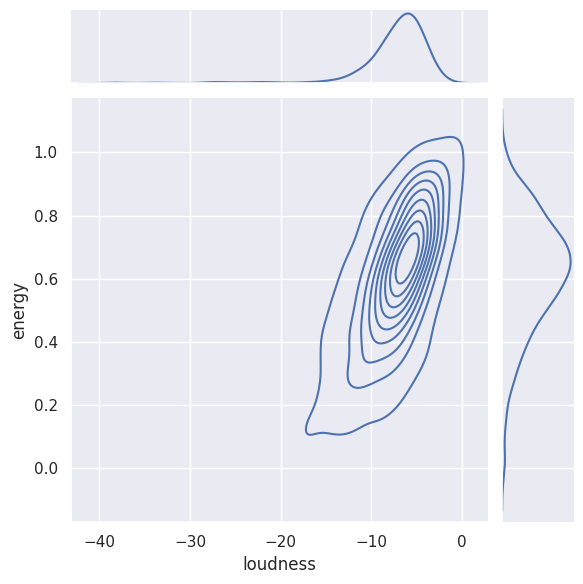

In [30]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

In [31]:
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

<ipython-input-31-010beab50b4f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_100_feat = top_100_feat.append(features, ignore_index=True)
<ipython-input-31-010beab50b4f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_100_feat = top_100_feat.append(features, ignore_index=True)
<ipython-input-31-010beab50b4f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_100_feat = top_100_feat.append(features, ignore_index=True)
<ipython-input-31-010beab50b4f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_100_feat = top_100_feat.append(features, ignore_index=True)
<ipython-input-31-010beab50b4f>:5: FutureWarning: The frame.appe

In [32]:
from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
mean_vals

<ipython-input-32-738030af7b6a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
<ipython-input-32-738030af7b6a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)


,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.659320,0.653150,0.085333,0.245852,0.061367,0.155411,0.448597
1,0.638673,0.616191,0.114146,0.259027,0.054883,0.176763,0.486386


In [33]:
import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)


fig.show()

In [34]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

The Chainsmokers Closer
David Bowie Life on Mars? - 2015 Remaster
Elton John Crocodile Rock
Van Morrison Have I Told You Lately
Don McLean American Pie - L'Tric Remix
NF The Search - Edit
Alok 2 Much 2 Handle
Coldplay Higher Power
Trey Songz Slow Motion
Mark Ronson Uptown Funk (feat. Bruno Mars)
LadBaby Sausage Rolls for Everyone
Jess Glynne All I Am
Coldplay Clocks
ABBA I Still Have Faith In You
Fleetwood Mac Go Your Own Way - 2004 Remaster
Michael Jackson Billie Jean
Elton John I Guess That's Why They Call It The Blues
Imagine Dragons Rise Up
Twenty One Pilots Lane Boy
Coldplay My Universe - Galantis Remix
OneRepublic Rich Love (with Seeb)
Elton John We All Fall In Love Sometimes
Troye Sivan Dance To This (feat. Ariana Grande)
Avicii Hey Brother
Halsey Without Me
Chris Brown New Flame
Jonas Blue Rise
Dire Straits Romeo And Juliet
Crosby, Stills & Nash Carried Away
Supertramp Lord Is It Mine - 2010 Remastered
Maroon 5 What Lovers Do
Adam Lambert Runnin'
U2 Pride (In The Name Of Love) 